# Solar home electricity data

Source: http://www.ausgrid.com.au/Common/About-us/Corporate-information/Data-to-share/Solar-home-electricity-data.aspx

PH April-May 2017

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
pd.__version__

'0.20.1'

## Load raw data

In [9]:
fname = 'data/Solar home 2011-2012.csv'

In [10]:
!head -n 3 "$fname"

### Parse CSV

(nb: parsing date is quite long):

In [11]:
d_raw = pd.read_csv(fname, skiprows=1,
                    parse_dates=['date'], dayfirst=True,
                    na_filter=False, dtype={'Row Quality': str})
len(d_raw)

270304

### Overview

rows seems ordered by: Customer / Consumption Category / date

In [12]:
d_raw.head()

,Customer,Generator Capacity,Postcode,Consumption Category,date,0:30,1:00,1:30,2:00,2:30,...,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,0:00,Row Quality
0,1,3.78,2076,CL,2011-07-01,1.250,1.250,1.250,0.625,0.219,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.063,
1,1,3.78,2076,GC,2011-07-01,1.077,0.669,0.674,0.615,0.321,...,0.276,0.241,0.168,0.234,0.164,0.639,0.118,0.219,0.162,
2,1,3.78,2076,GG,2011-07-01,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,
3,1,3.78,2076,CL,2011-07-02,1.238,1.244,1.194,0.000,0.888,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.075,
4,1,3.78,2076,GC,2011-07-02,0.476,0.130,0.044,0.094,0.032,...,0.234,0.306,0.183,0.240,0.170,0.506,0.224,0.088,0.084,


In [13]:
d_raw.tail()

,Customer,Generator Capacity,Postcode,Consumption Category,date,0:30,1:00,1:30,2:00,2:30,...,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,0:00,Row Quality
270299,300,3.36,2086,GC,2012-06-29,0.082,0.129,0.084,0.123,0.091,...,0.496,0.387,0.357,0.387,0.408,0.527,0.517,0.393,0.226,
270300,300,3.36,2086,GG,2012-06-29,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,
270301,300,3.36,2086,CL,2012-06-30,2.110,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.621,
270302,300,3.36,2086,GC,2012-06-30,0.247,0.193,0.109,0.115,0.096,...,1.526,0.799,0.822,0.244,0.200,0.204,0.131,0.358,0.235,
270303,300,3.36,2086,GG,2012-06-30,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,


### Details on major columns

#### Post codes: 

* 100 different codes
* between 2008 and 2330, which corresponds to New South Wales (cf. [Postcodes_in_Australia](https://en.wikipedia.org/wiki/Postcodes_in_Australia)), as said by Ausgrid
* Postcode geocoding: [Postcodes location.ipynb](Postcodes location.ipynb)
* Geocoding output: [postcodes.csv](postcodes/postcodes.csv)

![New South Wales](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a8/New_South_Wales_in_Australia.svg/267px-New_South_Wales_in_Australia.svg.png)

In [14]:
len(d_raw.Postcode.unique())

100

In [15]:
print(sorted(d_raw.Postcode.unique()))

[2008, 2010, 2018, 2021, 2025, 2026, 2029, 2031, 2034, 2037, 2039, 2041, 2044, 2046, 2047, 2048, 2066, 2074, 2076, 2077, 2079, 2081, 2082, 2084, 2085, 2086, 2087, 2088, 2092, 2093, 2096, 2099, 2100, 2111, 2119, 2120, 2126, 2134, 2135, 2137, 2154, 2159, 2162, 2190, 2196, 2198, 2200, 2203, 2204, 2205, 2207, 2208, 2209, 2211, 2216, 2218, 2219, 2220, 2224, 2227, 2228, 2229, 2230, 2231, 2233, 2250, 2251, 2259, 2260, 2261, 2262, 2263, 2264, 2265, 2278, 2280, 2281, 2282, 2283, 2284, 2285, 2286, 2289, 2290, 2291, 2292, 2293, 2294, 2295, 2296, 2300, 2303, 2305, 2315, 2320, 2321, 2324, 2325, 2326, 2330]


#### Dates

* `parse_date` option is working (although quite slow)
* `dayfirst=True` is needed to avoid date inversions

In [16]:
d_raw.date.head()

0   2011-07-01
1   2011-07-01
2   2011-07-01
3   2011-07-02
4   2011-07-02
Name: date, dtype: datetime64[ns]

In [17]:
%time min(d_raw.date)

CPU times: user 880 ms, sys: 0 ns, total: 880 ms
Wall time: 877 ms


Timestamp('2011-07-01 00:00:00')

In [19]:
%time d_raw.date.min()

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 2.46 ms


Timestamp('2011-07-01 00:00:00')

In [21]:
d0, d1 = d_raw.date.min(), d_raw.date.max()
d0, d1

(Timestamp('2011-07-01 00:00:00'), Timestamp('2012-06-30 00:00:00'))

#### Row Quality:

Ausgrid description:
> (Blank) = every half hour value in the row is the actual electricity
recorded by the meter in the half hour
>
> NA = Non-Actual where some or all of the half hour values in the
row are estimates or substitutes of the electricity consumed or
generated

Specifying the `dtype={'Row Quality': str}` is needed to avoid a columns of dtype float, filled with NaN.

In [23]:
d_raw['Row Quality'].unique()

array(['', 'NA'], dtype=object)

In [24]:
d_raw['Row Quality'].value_counts()

      270204
NA       100
Name: Row Quality, dtype: int64

#### Customers

300 unique values, from 1 to 300

In [25]:
len(d_raw['Customer'].unique())

300

In [26]:
d_raw['Customer'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

#### Consumption Category (aka measurement channel)

From Ausgrid description:

> **GC** = General Consumption for electricity supplied all the time
(primary tariff, either inclining block or time of use rates),
excluding solar generation and controlled load supply

> **CL** = Controlled Load Consumption (Off peak 1 or 2 tariffs)

> **GG** = Gross Generation for electricity generated by the solar
system with a gross metering configuration, measured separately
to household loads

Observation: only half as much CL as GG and GC.


In [27]:
d_raw['Consumption Category'].unique()

array(['CL', 'GC', 'GG'], dtype=object)

In [28]:
d_raw['Consumption Category'].value_counts()

GG    109800
GC    109800
CL     50704
Name: Consumption Category, dtype: int64

### Completeness of the record

there are some missing records in the dataframe:

* GG and GC is complete
* Some 54% of CL is missing.

In [29]:
len(d_raw)/366/300

2.461785063752277

In [30]:
d_raw['Consumption Category'].value_counts()/300/366

GG    1.000000
GC    1.000000
CL    0.461785
Name: Consumption Category, dtype: float64

## 2) Reshaping the data set.

Objective:

* Stack the time, to get proper timestamp combining day and hour
* pivot the customer and consumption category as columns

### Create datetime index

In [31]:
from pandas.tseries.offsets import Day

In [32]:
d1

Timestamp('2012-06-30 00:00:00')

In [33]:
d1 + Day(1)

Timestamp('2012-07-01 00:00:00')

Create the index, with **"left" convention** (start of the 30min interval), to make slicing for a given day easier

In [34]:
index = pd.date_range(d0, d1 + Day(1), freq='30T', closed='left')
index

DatetimeIndex(['2011-07-01 00:00:00', '2011-07-01 00:30:00',
               '2011-07-01 01:00:00', '2011-07-01 01:30:00',
               '2011-07-01 02:00:00', '2011-07-01 02:30:00',
               '2011-07-01 03:00:00', '2011-07-01 03:30:00',
               '2011-07-01 04:00:00', '2011-07-01 04:30:00',
               ...
               '2012-06-30 19:00:00', '2012-06-30 19:30:00',
               '2012-06-30 20:00:00', '2012-06-30 20:30:00',
               '2012-06-30 21:00:00', '2012-06-30 21:30:00',
               '2012-06-30 22:00:00', '2012-06-30 22:30:00',
               '2012-06-30 23:00:00', '2012-06-30 23:30:00'],
              dtype='datetime64[ns]', length=17568, freq='30T')

### Colums: Customer/Channel

using a MultiIndex, cf. [MultiIndex / Advanced Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) doc.

In [35]:
customers = sorted(d_raw.Customer.unique())
print(customers)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [36]:
channels = d_raw['Consumption Category'].unique()
channels

array(['CL', 'GC', 'GG'], dtype=object)

Customized channel order:

* Consumption first (GC)
* PV Generation second (GG)
* CL third, because it is not always present (small trick to preserve the channel color in plots)

In [37]:
channels = ['GC', 'GG', 'CL']

In [38]:
columns = pd.MultiIndex.from_product(
    (customers, channels), names=['Customer', 'Channel'])
columns

MultiIndex(levels=[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218

### Create the new DataFrame

starting from a blank DataFrame:

In [39]:
empty_cols = pd.MultiIndex(
    levels=[customers, channels],
    labels=[[],[]],
    names=['Customer', 'Channel'])

In [40]:
df = pd.DataFrame(index=index, columns=empty_cols)
df

2011-07-01 00:00:00
2011-07-01 00:30:00
2011-07-01 01:00:00
2011-07-01 01:30:00
2011-07-01 02:00:00
2011-07-01 02:30:00
2011-07-01 03:00:00
2011-07-01 03:30:00
2011-07-01 04:00:00
2011-07-01 04:30:00
2011-07-01 05:00:00


Fill the columns:

notice: 

* it is way slower when the 3x300 columns are pre-assigned in the DataFrame creation
* but the MultiIndex is lost when pre-assignment is not done (empty columns)
* → solution which seems to work: using an empty MultiIndex (customers/channel)

In [41]:
missing_records = []

for c in customers:
    d_c = d_raw[d_raw.Customer == c]
    
    # TODO: save the row quality
    print(c, end=', ')
    
    for ch in channels:
        d_c_ch = d_c[d_c['Consumption Category'] == ch]
        ts = d_c_ch.iloc[:,5:-1].values.ravel()
        if len(ts) != len(index):
            missing_records.append((c,ch, len(ts)))
        else:
            df[c, ch] = ts

1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222

#### Analysis of missing/imcomplete records

Observation: out of 162 missing records (over a potential of 900):

* 161 are the complete absence of the CL channel
* 1 is an incomplete CL channe (from 2011-07-01 to 2012-01-12): maybe a change of tariff ?

In [42]:
len(columns)

900

In [43]:
len(missing_records)

162

In [44]:
n_empty_CL = 0
missing_records_others = []
for (c, ch, len_ts) in missing_records:
    if ch=='CL' and len_ts==0:
        n_empty_CL += 1
    else:
        missing_records_others.append((c, ch, len_ts))
n_empty_CL

161

In [45]:
missing_records_others

[(27, 'CL', 9408)]

In [46]:
d_27_CL = d_raw[(d_raw.Customer == 27) & (d_raw['Consumption Category'] == 'CL')]
d_27_CL['date'].iloc[[0,-1]]

24522   2011-07-01
25107   2012-01-12
Name: date, dtype: datetime64[ns]

#### Check the new dataframe

In [47]:
len(df.columns) + len(missing_records)

900

In [48]:
df.head()

Customer               1                  2                3                \
Channel                 GC   GG     CL     GC   GG   CL     GC   GG     CL   
2011-07-01 00:00:00  1.077  0.0  1.250  0.276  0.0  0.0  0.060  0.0  2.008   
2011-07-01 00:30:00  0.669  0.0  1.250  0.134  0.0  0.0  0.062  0.0  0.218   
2011-07-01 01:00:00  0.674  0.0  1.250  0.169  0.0  0.0  0.060  0.0  0.000   
2011-07-01 01:30:00  0.615  0.0  0.625  0.185  0.0  0.0  0.059  0.0  0.000   
2011-07-01 02:00:00  0.321  0.0  0.219  0.141  0.0  0.0  0.060  0.0  0.000   

Customer               4    ...      297                298         299       \
Channel                 GC  ...       GC   GG     CL     GC   GG     GC   GG   
2011-07-01 00:00:00  0.104  ...    0.268  0.0  0.000  0.100  0.0  0.140  0.0   
2011-07-01 00:30:00  0.107  ...    0.329  0.0  0.000  0.068  0.0  0.160  0.0   
2011-07-01 01:00:00  0.104  ...    0.306  0.0  0.000  0.068  0.0  0.116  0.0   
2011-07-01 01:30:00  0.108  ...    0.233  0.0  1.311  0.068  0.0  0.162  0.0   
2011-07-01 02:00:00  0.110  ...    0.265  0.0  0.000  0.069  0.0  0.138  0.0   

Customer               300              
Channel                 GC   GG     CL  
2011-07-01 00:00:00  1.034  0.0  2.533  
2011-07-01 00:30:00  0.631  0.0  0.265  
2011-07-01 01:00:00  0.119  0.0  0.000  
2011-07-01 01:30:00  0.098  0.0  0.000  
2011-07-01 02:00:00  0.109  0.0  0.000  

[5 rows x 738 columns]

In [49]:
df.tail()

Customer               1                  2                3                \
Channel                 GC   GG     CL     GC   GG   CL     GC     GG   CL   
2012-06-30 21:30:00  0.622  0.0  0.000  0.368  0.0  0.0  0.066  0.000  0.0   
2012-06-30 22:00:00  0.509  0.0  0.000  0.305  0.0  0.0  0.768  0.000  0.0   
2012-06-30 22:30:00  0.716  0.0  0.000  0.285  0.0  0.0  0.966  0.000  0.0   
2012-06-30 23:00:00  0.999  0.0  0.000  0.286  0.0  0.0  0.957  0.006  0.0   
2012-06-30 23:30:00  0.916  0.0  1.063  0.188  0.0  0.0  0.902  0.000  0.0   

Customer               4    ...      297                298         299       \
Channel                 GC  ...       GC   GG     CL     GC   GG     GC   GG   
2012-06-30 21:30:00  0.159  ...    0.366  0.0  0.000  0.173  0.0  1.095  0.0   
2012-06-30 22:00:00  0.134  ...    0.458  0.0  0.814  0.154  0.0  0.946  0.0   
2012-06-30 22:30:00  0.101  ...    0.305  0.0  2.369  0.150  0.0  1.834  0.0   
2012-06-30 23:00:00  0.086  ...    0.165  0.0  1.915  0.142  0.0  1.719  0.0   
2012-06-30 23:30:00  0.082  ...    0.206  0.0  0.000  0.145  0.0  1.412  0.0   

Customer               300              
Channel                 GC   GG     CL  
2012-06-30 21:30:00  0.200  0.0  0.000  
2012-06-30 22:00:00  0.204  0.0  0.000  
2012-06-30 22:30:00  0.131  0.0  0.000  
2012-06-30 23:00:00  0.358  0.0  0.000  
2012-06-30 23:30:00  0.235  0.0  2.621  

[5 rows x 738 columns]

### Unit conversion: kWh → kW

Energy records in the original CSV file is in kWh on the 30 min interval. Convert to kW.

In [146]:
df[1].mean()

Channel
GC    0.292210
GG    0.269105
CL    0.146694
dtype: float64

In [147]:
df *= 2

In [148]:
df[1].mean()

Channel
GC    0.584421
GG    0.538209
CL    0.293388
dtype: float64

## 3) Howto work with the reshaped DataFrame

### 3a) select *one* customer, with all its 3 channels

this easy because `customer` is the first level of the MultiIndex

In [149]:
df[1]

Channel,GC,GG,CL
2011-07-01 00:00:00,2.154,0.000,2.500
2011-07-01 00:30:00,1.338,0.000,2.500
2011-07-01 01:00:00,1.348,0.000,2.500
2011-07-01 01:30:00,1.230,0.000,1.250
2011-07-01 02:00:00,0.642,0.000,0.438
2011-07-01 02:30:00,0.194,0.000,2.026
2011-07-01 03:00:00,1.054,0.000,0.000
2011-07-01 03:30:00,0.140,0.000,0.000
2011-07-01 04:00:00,0.098,0.000,0.250
2011-07-01 04:30:00,0.170,0.000,1.788


In [150]:
df[1].mean()

Channel
GC    0.584421
GG    0.538209
CL    0.293388
dtype: float64

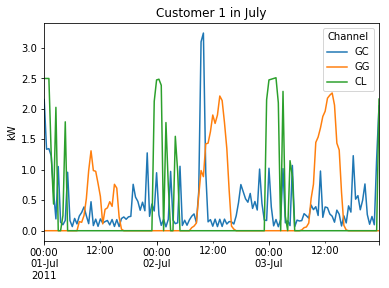

In [151]:
df[1]['2011-07-01':'2011-07-03'].plot()
plt.title('Customer 1 in July')
plt.ylabel('kW')
plt.savefig('Customer 1 2011-07 01-03.png', dpi=150);

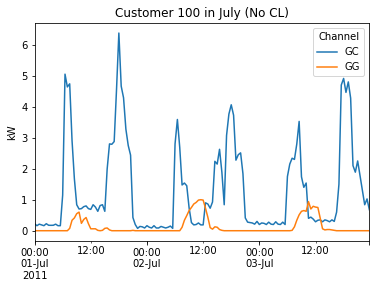

In [152]:
df[100]['2011-07-01':'2011-07-03'].plot()
plt.ylabel('kW')
plt.title('Customer 100 in July (No CL)');

### 3b) select *one* channel, across *all* customers

This is less easy because `channel` is the 2nd level of the MultiIndex.
It requires using [cross-section](http://pandas.pydata.org/pandas-docs/stable/advanced.html#cross-section) indexing with `xs`

In [153]:
dfGG = df.xs('GG', level='Channel', axis=1)
dfGG[[1, 4, 100]]

Customer,1,4,100
2011-07-01 00:00:00,0.000,0.000,0.000
2011-07-01 00:30:00,0.000,0.000,0.000
2011-07-01 01:00:00,0.000,0.000,0.000
2011-07-01 01:30:00,0.000,0.000,0.000
2011-07-01 02:00:00,0.000,0.000,0.000
2011-07-01 02:30:00,0.000,0.000,0.000
2011-07-01 03:00:00,0.000,0.000,0.000
2011-07-01 03:30:00,0.000,0.000,0.000
2011-07-01 04:00:00,0.000,0.000,0.000
2011-07-01 04:30:00,0.000,0.000,0.000


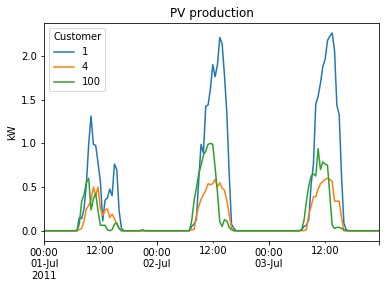

In [154]:
dfGG[[1, 4, 100]]['2011-07-01':'2011-07-03'].plot()
plt.title('PV production')
plt.ylabel('kW')
plt.savefig('PV production 2011-07 01-03.png', dpi=150);

## 4) Some stats

### 4a) PV generation capacity of each customer

observations:

* Generation capacity is constant over 2011-2012 (no generation upgrade)
* Mean at 1.68, *in agreement with data note* from Ausgrid (§ Summary statistics, p2)
* Most (75%) are between 1 and 2 kW.
* Some (2%) are around 6, 8 or 10 kW.

In [96]:
d_cust_cap = d_raw[['Customer', 'Generator Capacity']]
d_cust_cap.iloc[[0,1,2000, -1]]

,Customer,Generator Capacity
0,1,3.78
1,1,3.78
2000,2,1.62
270303,300,3.36


Check if the generator capacity is constant for each customer:

In [104]:
d_cust_cap.groupby('Customer')['Generator Capacity'].nunique().value_counts()

1    300
Name: Generator Capacity, dtype: int64

In [125]:
gen_cap = d_cust_cap.groupby('Customer')['Generator Capacity'].mean()
gen_cap.describe(percentiles=[0.5, 0.8, 0.9, 0.980])

count    300.000000
mean       1.683300
std        1.036846
min        1.000000
50%        1.500000
80%        2.040000
90%        2.728000
98%        4.571200
max        9.990000
Name: Generator Capacity, dtype: float64

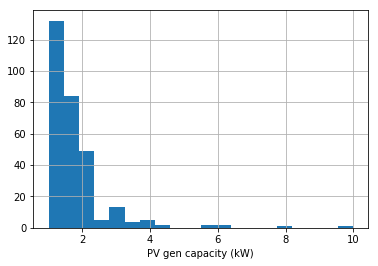

In [126]:
ax = gen_cap.hist(bins=20)
ax.set(xlabel='PV gen capacity (kW)')
#ax.set_yscale('log')

### 4b) Yield of PV generation 

* annual generation (kWh)
* sun hours/year (kWh/kWp)

#### Check of one customer

In [155]:
gen_cap[1]

3.7800000000000842

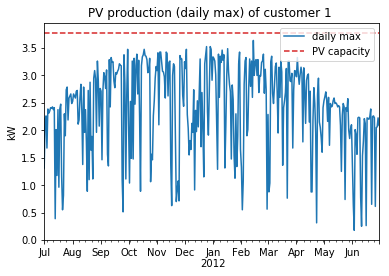

In [164]:
dfGG[1].resample('1D').max().plot(label='daily max')
plt.title('PV production (daily max) of customer 1 ')
plt.ylabel('kW')
plt.hlines(gen_cap[1], df.index[0], df.index[-1], linestyles='dashed', color='tab:red', label='PV capacity')
plt.legend();

#### Global statistics of PV generation

* Production mean and median *in agreement with data note* from Ausgrid (§ Summary statistics, p2)

* Normalized by capacity: **1231 hours/y** averaged across all customers
* All are above 800 hours/y, except 4 customers

NB: the coast around Sidney's has a GHI between 4-5 kWh/m²/day, that is **1500-1800 kWh/m²/y**

<img src='external/SolarGIS Australia GHI map south.png' alt='Australia GHI map' style='width:50em'>

In [167]:
dt = 0.5 # hours
GG_year = dfGG.sum()*dt
GG_year.mean(), GG_year.median()

(2083.180033333341, 1708.0875000000215)

In [171]:
pv_perf = GG_year/gen_cap
pv_perf.mean()

1230.5549200014514

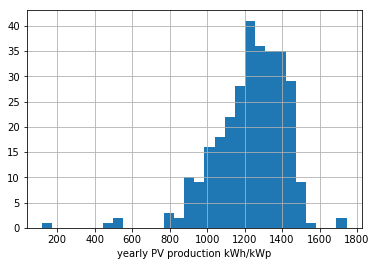

In [218]:
pv_perf.hist(bins=30)
plt.xlabel('yearly PV production kWh/kWp');

#### PV installations with bad performance:

observation: bad performance relates to periods of blank production (maintenance issue or record issue ?).

In [189]:
cust_lowpv = pv_perf.index[pv_perf<700]
pv_perf[cust_lowpv].round()

Customer
92     119.0
220    461.0
234    533.0
239    527.0
dtype: float64

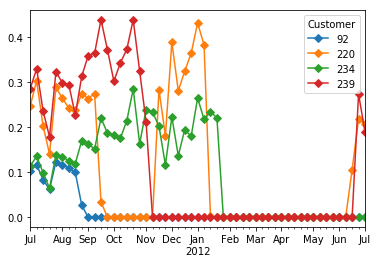

In [188]:
dfGG[cust_lowpv].resample('1W').mean().plot(style='-D')

### 4c) Consumption average

Notice: without caring for NaN values, the average consumption **doesn't match** the data note from Ausgrid (§ Summary statistics, p2).

In [197]:
dfGC = df.xs('GC', level='Channel', axis=1)
dfCL = df.xs('CL', level='Channel', axis=1)

In [201]:
dt = 0.5 # hours
GC_year = dfGC.sum()*dt
CL_year = dfCL.sum()*dt

GC_year.mean(), CL_year.mean(), GC_year.mean()+  CL_year.mean(), (GC_year +  CL_year).mean()

(5738.998883333322, 1863.789572463766, 7602.788455797088, 7043.790789855059)

In [203]:
len(CL_year), len(GC_year)

(138, 300)

In [213]:
GC_year +  CL_year

Customer
1       7710.675
2       8493.488
3       3464.013
4       5350.537
5       4154.427
6      11049.959
7       6297.717
8      12445.192
9       5042.297
10      6654.568
11           NaN
12           NaN
13           NaN
14      3636.917
15      3283.148
16           NaN
17           NaN
18      8150.175
19      2617.498
20           NaN
21           NaN
22           NaN
23      6139.032
24           NaN
25           NaN
26           NaN
27           NaN
28           NaN
29      5505.936
30      3781.780
         ...    
271    11093.339
272     4133.785
273          NaN
274     9694.788
275          NaN
276          NaN
277     4711.474
278          NaN
279    11464.558
280          NaN
281     5923.665
282          NaN
283     3438.182
284     4461.087
285     4956.869
286    10382.334
287    12452.352
288          NaN
289    12316.420
290     7815.447
291          NaN
292          NaN
293    12764.541
294     8265.949
295          NaN
296          NaN
297     6890.217
298  

Proper treatment of NaNs:

In [212]:
Cons_y = pd.DataFrame({'GCy': GC_year, 'CLy':  CL_year})
Cons_y.sum(axis=1)

Customer
1       7710.675
2       8493.488
3       3464.013
4       5350.537
5       4154.427
6      11049.959
7       6297.717
8      12445.192
9       5042.297
10      6654.568
11      6560.894
12      5938.369
13      4840.914
14      3636.917
15      3283.148
16     10129.030
17      7831.254
18      8150.175
19      2617.498
20      4632.129
21     11182.840
22      4527.870
23      6139.032
24      6229.264
25      5711.299
26      7742.674
27      6416.623
28      3965.804
29      5505.936
30      3781.780
         ...    
271    11093.339
272     4133.785
273     4271.345
274     9694.788
275     6333.698
276     8637.535
277     4711.474
278     3231.753
279    11464.558
280     6182.487
281     5923.665
282     3389.128
283     3438.182
284     4461.087
285     4956.869
286    10382.334
287    12452.352
288     4570.903
289    12316.420
290     7815.447
291     5746.336
292     3259.321
293    12764.541
294     8265.949
295     3136.466
296     2844.458
297     6890.217
298  

average 6596 kWh: match data note!

In [214]:
Cons_y.sum(axis=1).mean()

6596.342086666654

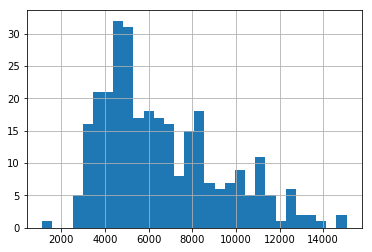

In [228]:
Cons_y.sum(axis=1).hist(bins=30)

#### Max consumption:

In [235]:
Cons = dfGC.add(dfCL, fill_value=0) 
Cons.max().describe()

count    300.000000
mean       7.046480
std        2.175902
min        2.426000
25%        5.609500
50%        6.827000
75%        8.358000
max       15.610000
dtype: float64

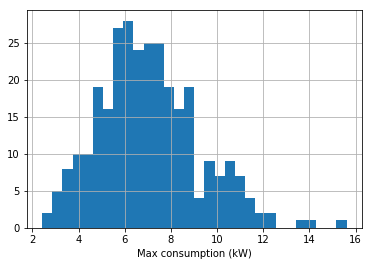

In [236]:
Cons.max().hist(bins=30)
plt.xlabel('Max consumption (kW)');

#### Full load equivalent time

T = E_year/P_max

In [242]:
Cons_hours = Cons_y.sum(axis=1)/Cons.max()
Cons_hours.describe()

count     300.000000
mean      957.708700
std       316.432769
min       287.244484
25%       704.633320
50%       937.249319
75%      1162.306100
max      2368.646331
dtype: float64

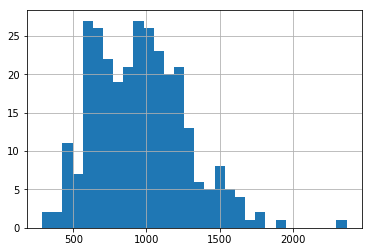

In [241]:
Cons_hours.hist(bins=30)

#### Effect of having controlled load or not

consumers with controlled load consume a bit more electricity, but the gap is quite small (14%).

In [251]:
has_CL = Cons_y['CLy']>0
has_CL.sum()

136

In [253]:
n_empty_CL

161

In [274]:
Cons_y[~has_CL].sum(axis=1).mean(), Cons_y[has_CL].sum(axis=1).mean()

(6200.501024390227, 7073.679838235281)

In [275]:
Cons_y[has_CL].sum(axis=1).mean() / Cons_y[~has_CL].sum(axis=1).mean()

1.1408239125209925

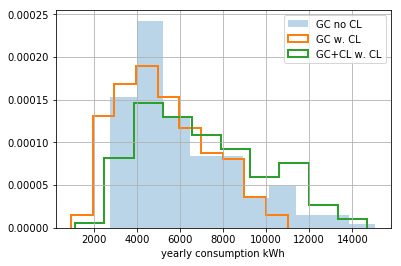

In [280]:
hparams = dict(normed=True, histtype='step', lw=2)
Cons_y[~has_CL]['GCy'].hist(label='GC no CL', normed=True, alpha=0.3)
Cons_y[has_CL]['GCy'].hist(label='GC w. CL', **hparams)
Cons_y[has_CL].sum(axis=1).hist(label='GC+CL w. CL', **hparams)
plt.xlabel('yearly consumption kWh')
plt.legend();

### 4d) Consumption/Production relationship

observations: there a small positive effect of the consumpation on the PV sizing. However the effect varies with quantiles (cf. Statsmodel [quantile regression example](http://www.statsmodels.org/devel/examples/notebooks/generated/quantile_regression.html)). There is a spreading effect.

* high quantiles: big PV production comes with bit consumers
* low quantiles: small PV production is almost independent of consumption

#### Average data

TODO: add controlled consumption to GC

In [245]:
import statsmodels.formula.api as smf

In [284]:
d = pd.DataFrame({
    'GC_ym': dfGC.mean(), 
    'GG_ym': dfGG.mean()})
mod = smf.quantreg('GG_ym ~ GC_ym', d)
res = mod.fit(q=0.5)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                  GG_ym   Pseudo R-squared:              0.02678
Model:                       QuantReg   Bandwidth:                     0.06531
Method:                 Least Squares   Sparsity:                       0.2066
Date:                Mon, 22 May 2017   No. Observations:                  300
Time:                        14:42:12   Df Residuals:                      298
                                        Df Model:                            1
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1297      0.015      8.459      0.000       0.100       0.160
GC_ym          0.1016      0.022      4.700      0.000       0.059       0.144
==============================================================================
"""

In [289]:
par = res.params
par

Intercept    0.129720
GC_ym        0.101633
dtype: float64

In [296]:
x = np.linspace(0.1, 1.7)
y = par.Intercept + x*par.GC_ym

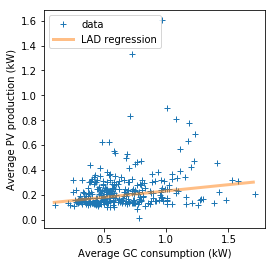

In [301]:
plt.plot(dfGC.mean(), dfGG.mean(), '+', label='data')
plt.plot(x, y, '-', lw=3, alpha=0.5, label='LAD regression')
ax = plt.gca()
plt.legend()
ax.set(
    xlabel='Average GC consumption (kW)',
    ylabel='Average PV production (kW)',
    aspect='equal'
);

#### Max data (i.e. system sizing)

In [311]:
d = pd.DataFrame({
    'GC_max': dfGC.max(), 
    'GG_max': dfGG.max()})
mod = smf.quantreg('GG_max ~ GC_max', d)
res = mod.fit(q=0.5)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                 GG_max   Pseudo R-squared:              0.01191
Model:                       QuantReg   Bandwidth:                      0.4026
Method:                 Least Squares   Sparsity:                        1.426
Date:                Mon, 22 May 2017   No. Observations:                  300
Time:                        14:51:44   Df Residuals:                      298
                                        Df Model:                            1
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0623      0.129      8.238      0.000       0.809       1.316
GC_max         0.0407      0.019      2.101      0.036       0.003       0.079
==============================================================================
"""

In [312]:
par = res.params
par

Intercept    1.062331
GC_max       0.040734
dtype: float64

In [313]:
x = np.linspace(2, 15)
y = par.Intercept + x*par.GC_max

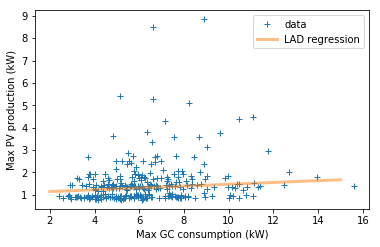

In [314]:
plt.plot(dfGC.max(), dfGG.max(), '+', label='data')
plt.plot(x, y, '-', lw=3, alpha=0.5, label='LAD regression')
ax = plt.gca()
plt.legend()
ax.set(
    xlabel='Max GC consumption (kW)',
    ylabel='Max PV production (kW)',
    aspect='equal'
);

### 4e) Correlation across PV productions

In [315]:
pv_corr = dfGG.corr()

In [316]:
pv_corr.iloc[0:5,0:5]

Customer,1,2,3,4,5
Customer,,,,,
1,1.000000,0.861145,0.865654,0.924266,0.887806
2,0.861145,1.000000,0.911912,0.857172,0.956018
3,0.865654,0.911912,1.000000,0.838399,0.924184
4,0.924266,0.857172,0.838399,1.000000,0.879999
5,0.887806,0.956018,0.924184,0.879999,1.000000


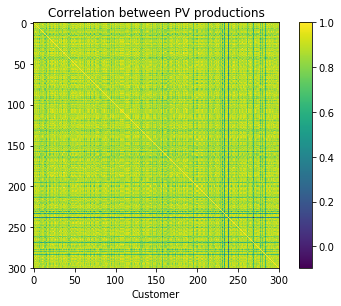

In [317]:
plt.imshow(pv_corr)
plt.colorbar()
plt.tight_layout()
plt.xlabel('Customer')
plt.title('Correlation between PV productions');

#### Effect of the distance on the correlation

distance estimated with geocoding

In [319]:
from itertools import combinations # Combinatoric generator

In [370]:
df_pcodes = pd.read_csv('postcodes/postcodes.csv', comment='#', index_col='postcode')
df_pcodes

,lat,lng,dlat_km,dlng_km,area_km2
postcode,,,,,
2008,-33.887887,151.196402,1.178955,1.766613,2.082757
2010,-33.882559,151.213158,2.039637,2.559093,5.219621
2018,-33.921990,151.207330,3.230835,2.408996,7.783069
2021,-33.892120,151.230645,3.256143,2.567510,8.360180
2025,-33.886500,151.243761,1.142317,2.256786,2.577965
2026,-33.892251,151.271453,2.556738,2.590240,6.622565
2029,-33.875421,151.265623,2.447767,2.433724,5.957190
2031,-33.912245,151.239388,3.536777,4.301904,15.214876
2034,-33.923619,151.253963,3.006322,1.589586,4.778806


Postcode of customers:

* some post codes have many customers (2259, 2261: Central Coast area, 2290: New Castle)
* many only one or two customer per postcode

In [329]:
cust_code = d_raw.groupby('Customer')['Postcode'].min()
cust_code.value_counts()

2259    28
2261    21
2290    13
2093     9
2262     8
2204     7
2126     6
2100     6
2263     6
2291     6
2076     6
2289     6
2086     5
2280     5
2077     5
2074     5
2285     5
2137     5
2305     5
2190     4
2282     4
2087     4
2251     4
2066     4
2284     4
2320     3
2228     3
2325     3
2265     3
2230     3
        ..
2084     1
2029     1
2081     1
2031     1
2034     1
2039     1
2324     1
2231     1
2315     1
2135     1
2264     1
2278     1
2224     1
2281     1
2286     1
2216     1
2211     1
2209     1
2292     1
2207     1
2294     1
2295     1
2200     1
2198     1
2196     1
2296     1
2162     1
2154     1
2046     1
2047     1
Name: Postcode, Length: 100, dtype: int64

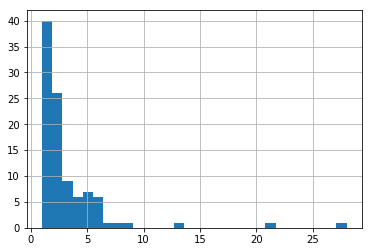

In [338]:
cust_code.value_counts().hist(bins=30)

Helper: compute distance between two places given as (lat, long)

use formula "haversine formula" from [Great-circle_distance](https://en.wikipedia.org/wiki/Great-circle_distance#Computational_formulas).

In [369]:
def great_circle(latlong1, latlong2):
    '''great circle distance between two points on a spherical earth
    
    longitudes and latitudes in degrees. Distance in km.
    '''
    R = 6371 # km
    d2r = np.deg2rad
    from numpy import cos, sin, arcsin, sqrt
    
    lat1, lng1 = latlong1
    lat2, lng2 = latlong2
    dlat = d2r(lat2 - lat1)
    dlng = d2r(lng2 - lng1)
    
    cos12 = cos(d2r(lat1))*cos(d2r(lat2))
                       
    a = sin(dlat/2)**2 + cos12*np.sin(dlng/2)**2
    ang = 2*arcsin(sqrt(a))
    return R*ang

cities = {
    'Newcastle': (-32.933, 151.733),
    'Cessnock': (-32.834, 151.3555),
    'Gosford': (-33.433, 151.33),
    'Sydney':  (-33.856, 151.1925),
    'Paris': (48.8571, 2.35191),
    'Rennes': (48.11449, -1.67902)
}
#great_circle(cities['Rennes'], cities['Paris']) # check 309 km
great_circle(cities['Newcastle'], cities['Sydney']), great_circle(cities['Newcastle'], cities['Cessnock'])

(114.24202913650407, 36.929388045354493)

Compute distances for each pair of customer (***takes ~ 1min***)

In [ ]:
pv_corr_flat = []
for (c1, c2) in combinations(customers, 2):
    p1, p2 = cust_code[c1], cust_code[c2]
    d = great_circle(
        (df_pcodes.loc[p1][['lat','lng']]),
        (df_pcodes.loc[p2][['lat','lng']]),
        )
    pv_corr_flat.append([c1, c2, pv_corr.loc[c1,c2], p1, p2, d])

In [379]:
df_pv_corr = pd.DataFrame(pv_corr_flat, columns=['c1', 'c2', 'corr12', 'c1_code', 'c2_code', 'd_km'])
df_pv_corr

,c1,c2,corr12,c1_code,c2_code,d_km
0,1,2,0.861145,2076,2259,59.737864
1,1,3,0.865654,2076,2263,62.207342
2,1,4,0.924266,2076,2220,27.857812
3,1,5,0.887806,2076,2261,48.166077
4,1,6,0.862610,2076,2230,39.377330
5,1,7,0.870251,2076,2259,59.737864
6,1,8,0.825935,2076,2126,7.866807
7,1,9,0.877647,2076,2259,59.737864
8,1,10,0.850608,2076,2262,67.982245
9,1,11,0.853687,2076,2026,24.609799


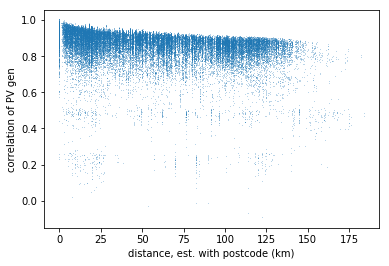

In [385]:
plt.plot(df_pv_corr.d_km, df_pv_corr.corr12, ',', alpha=0.3)
plt.xlabel('distance, est. with postcode (km)')
plt.ylabel('correlation of PV gen');

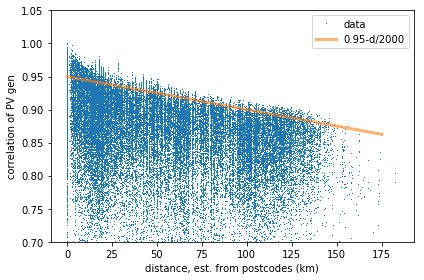

In [406]:
plt.plot(df_pv_corr.d_km, df_pv_corr.corr12, ',', alpha=1, label='data')

d = np.linspace(0, 175)
plt.plot(d, 0.95-d/2000, lw=3, alpha=0.6, label='0.95-d/2000')

plt.legend()
plt.ylim(0.7, 1.05)
plt.xlabel('distance, est. from postcodes (km)')
plt.ylabel('correlation of PV gen');
plt.tight_layout()
plt.savefig('PV corr distance.png', dpi=150)

Possible refinements:

* compare with other "correlation vs. distance" reports from the litterature...
* filter out the very large postcode areas